In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, Normalization
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('movie_statistic_dataset.csv')

df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [3]:
print(df.columns)

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')


In [4]:
X = df[['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']]
# X = df[['runtime_minutes', 'movie_averageRating', 'approval_Index', 'Production budget $', 'Worldwide gross $']]
# director = pd.get_dummies(df['director_name'])
# X = pd.concat([X, director], axis=1)
genres_dummies = df['genres'].str.get_dummies(sep=',')
# y = pd.get_dummies(df['genres'])
y = np.asarray(genres_dummies)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [6]:
print(X_train.shape[1])
print(y_train.shape)
print(y_train.shape[1])

7
(3504, 24)
24


In [7]:
model1 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(y_train.shape[1], activation='softmax')
])

model2 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(y_train.shape[1], activation='softmax')
])

model3 = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    LayerNormalization(),
    Dense(140, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    LayerNormalization(),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    LayerNormalization(),
    Dense(70, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    LayerNormalization(),
    Dense(y_train.shape[1], activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
optimizer1 = Adam(learning_rate=0.001, clipnorm=1.0)

model1.compile(
    optimizer=optimizer1, 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    run_eagerly=True
)

optimizer2 = Adam(learning_rate=0.0001, clipnorm=1.0)

model2.compile(
    optimizer=optimizer2, 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    run_eagerly=True
)

optimizer3 = Adam(learning_rate=0.001, clipnorm=1.0)

model3.compile(
    optimizer=optimizer3, 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    run_eagerly=True
)

In [9]:
model1_history =  model1.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.40, 
    batch_size=40, 
    verbose=2
)

model2_history =  model2.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

model3_history =  model3.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/50


53/53 - 2s - 35ms/step - accuracy: 0.1584 - loss: 7.9459 - val_accuracy: 0.1548 - val_loss: 7.8482
Epoch 2/50
53/53 - 2s - 29ms/step - accuracy: 0.1922 - loss: 7.7977 - val_accuracy: 0.1548 - val_loss: 7.8410
Epoch 3/50
53/53 - 2s - 28ms/step - accuracy: 0.1717 - loss: 7.8791 - val_accuracy: 0.1548 - val_loss: 7.8911
Epoch 4/50
53/53 - 2s - 29ms/step - accuracy: 0.1779 - loss: 7.8995 - val_accuracy: 0.1548 - val_loss: 7.9594
Epoch 5/50
53/53 - 2s - 29ms/step - accuracy: 0.1855 - loss: 7.9451 - val_accuracy: 0.1548 - val_loss: 8.0513
Epoch 6/50
53/53 - 2s - 29ms/step - accuracy: 0.1717 - loss: 8.0595 - val_accuracy: 0.1548 - val_loss: 8.2033
Epoch 7/50
53/53 - 1s - 28ms/step - accuracy: 0.1846 - loss: 8.1430 - val_accuracy: 0.1548 - val_loss: 8.3044
Epoch 8/50
53/53 - 2s - 28ms/step - accuracy: 0.1832 - loss: 8.2390 - val_accuracy: 0.1548 - val_loss: 8.4055
Epoch 9/50
53/53 - 1s - 28ms/step - accuracy: 0.1965 - loss: 8.3153 - val_accuracy: 0.1548 - val_loss: 8.4959
Epoch 10/50
53/53 - 1

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

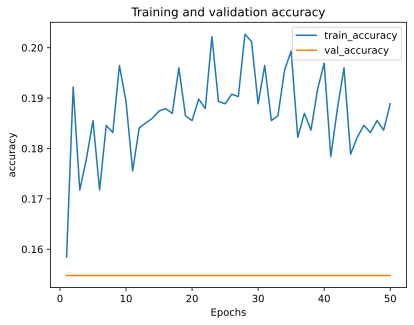

In [11]:
plot_metric(model1_history, 'accuracy')

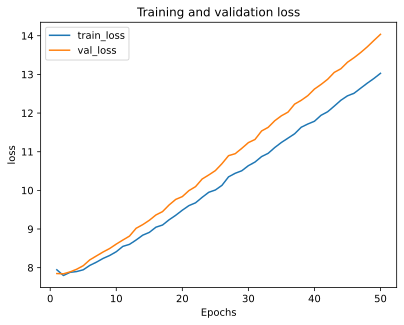

In [12]:
plot_metric(model1_history, 'loss')

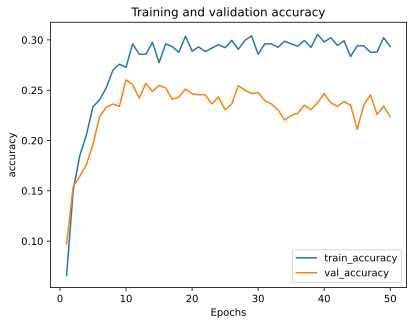

In [13]:
plot_metric(model2_history, 'accuracy')

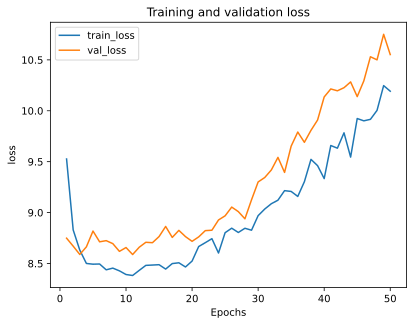

In [14]:
plot_metric(model2_history, 'loss')

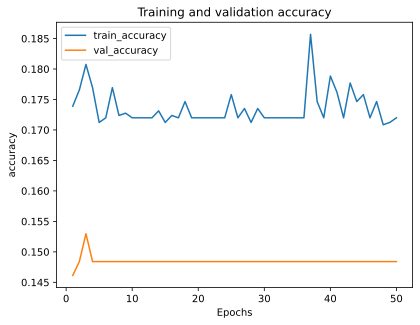

In [15]:
plot_metric(model3_history, 'accuracy')

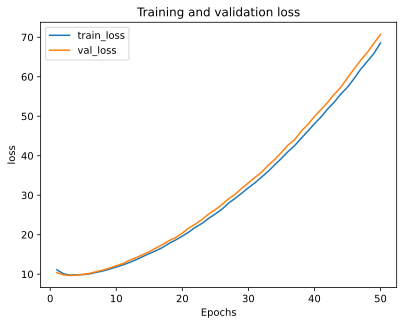

In [16]:
plot_metric(model3_history, 'loss')

In [17]:
model1.evaluate(X_test, y_test, verbose=2)

28/28 - 0s - 6ms/step - accuracy: 0.1815 - loss: 12.2547


[12.25473690032959, 0.18150684237480164]

In [18]:
model2.evaluate(X_test, y_test, verbose=2)

28/28 - 0s - 6ms/step - accuracy: 0.2660 - loss: 1512.5995


[1512.5994873046875, 0.2659817337989807]

In [19]:
model3.evaluate(X_test, y_test, verbose=2)

28/28 - 0s - 8ms/step - accuracy: 0.1815 - loss: 58.6719


[58.67185592651367, 0.18150684237480164]